In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#LOADING DATA
df=pd.read_csv('indianpopulation.csv')

In [33]:
#Looking at the first few rows of data.
df.head()

,Year,Population,% Increase in Population,Population Density,Life Expectancy,% Increase in Life Expectancy,Birth Rate,% Change in Birth Rate,Death Rate,% Change in Death Rate,Infant Mortality Rate,% Change in Infant Mortality Rate,Fertility Rate,% Change in Fertility Rate,Net Migration Rate,% Change in Net Migration Rate
0,1950,"35,70,21,100",0.01%,108.61,35.21,0.01%,44.175,0.01%,28.161,0.01%,189.629,0.01%,5.907,0.01%,-0.043,0.01%
1,1951,"36,49,22,360",2.21%,111.01,35.80,1.68%,43.970,-0.46%,27.584,-2.05%,186.737,-1.53%,5.906,-0.02%,-0.047,9.30%
2,1952,"37,29,97,188",2.21%,113.47,36.39,1.65%,43.764,-0.47%,27.008,-2.09%,183.846,-1.55%,5.904,-0.03%,-0.050,6.38%
3,1953,"38,12,27,705",2.21%,115.97,36.98,1.62%,43.558,-0.47%,26.432,-2.13%,180.954,-1.57%,5.903,-0.02%,-0.054,8.00%
4,1954,"38,97,31,406",2.23%,118.56,37.57,1.60%,43.352,-0.47%,25.856,-2.18%,178.062,-1.60%,5.902,-0.02%,-0.058,7.41%


In [34]:
#Getting a detailed preview at each column and its data type and number of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               73 non-null     int64  
 1   Population                         73 non-null     object 
 2   % Increase in Population           73 non-null     object 
 3   Population Density                 73 non-null     float64
 4   Life Expectancy                    73 non-null     float64
 5   % Increase in Life Expectancy      73 non-null     object 
 6   Birth Rate                         73 non-null     float64
 7   % Change in Birth Rate             73 non-null     object 
 8   Death Rate                         73 non-null     float64
 9   % Change in Death Rate             73 non-null     object 
 10  Infant Mortality Rate              73 non-null     float64
 11  % Change in Infant Mortality Rate  73 non-null     object 
 

In [35]:
#Looking at statistical measures of each variable
df.describe()

,Year,Population Density,Life Expectancy,Birth Rate,Death Rate,Infant Mortality Rate,Fertility Rate,Net Migration Rate
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.000000,254.828356,54.859315,32.179945,13.868644,101.888589,4.292452,-0.069932
std,21.217131,102.096980,10.535942,8.686743,6.368455,49.441656,1.344772,0.279932
min,1950.000000,108.610000,35.210000,17.163000,7.237000,27.695000,2.159000,-0.446000
25%,1968.000000,162.270000,46.100000,24.752000,8.261000,57.854000,3.071000,-0.343000
50%,1986.000000,242.720000,55.980000,34.025000,12.008000,98.213000,4.432000,-0.068000
75%,2004.000000,345.660000,63.910000,39.769000,18.368000,145.809000,5.723000,0.039000
max,2022.000000,431.110000,70.190000,44.175000,28.161000,189.629000,5.907000,0.715000


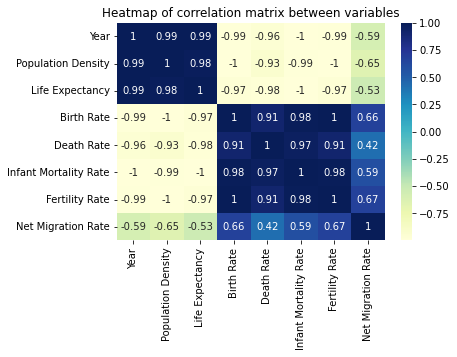

In [36]:
#Exploring the relationships between variables.
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.title("Heatmap of correlation matrix between variables");

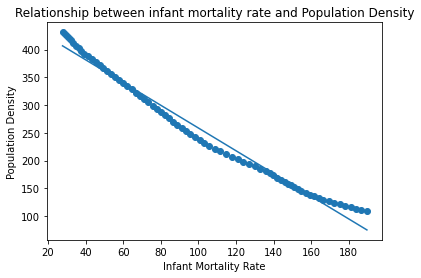

In [37]:
#Clearly Infant Mortaltity Rate and Population Density have a strong positive correlation. This can be better understood using a 
#scatterplot.
plt.scatter(df['Infant Mortality Rate'],df['Population Density'])
z=np.polyfit(df['Infant Mortality Rate'],df['Population Density'],1)
p=np.poly1d(z)
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Population Density')
plt.plot(df['Infant Mortality Rate'],p(df['Infant Mortality Rate']))
plt.title("Relationship between infant mortality rate and Population Density");

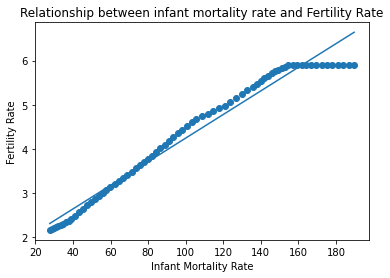

In [38]:
#Clearly Infant Mortaltity Rate and Fertility Rate have a strong positive correlation. This can be better understood using a 
#scatterplot.
plt.scatter(df['Infant Mortality Rate'],df['Fertility Rate'])
z=np.polyfit(df['Infant Mortality Rate'],df['Fertility Rate'],1)
p=np.poly1d(z)
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Fertility Rate')
plt.plot(df['Infant Mortality Rate'],p(df['Infant Mortality Rate']))
plt.title("Relationship between infant mortality rate and Fertility Rate");

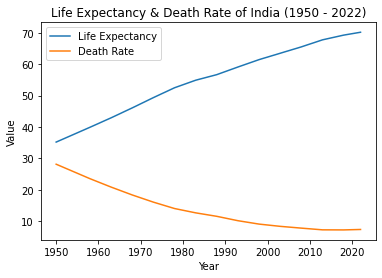

In [39]:
#Clearly Life Expectancy and Death Rate
plt.plot(df["Year"],df["Life Expectancy"])
plt.plot(df["Year"],df["Death Rate"])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Life Expectancy & Death Rate of India (1950 - 2022)")
plt.legend(["Life Expectancy", "Death Rate"], loc="upper left");

Text(0.5, 1.0, 'Fertility Rate of India(1950 - 2022)')

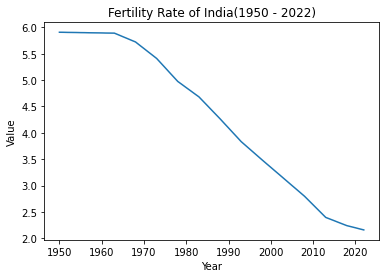

In [40]:
#Fertility rate 
plt.plot(df['Year'],df['Fertility Rate'])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Fertility Rate of India(1950 - 2022)")

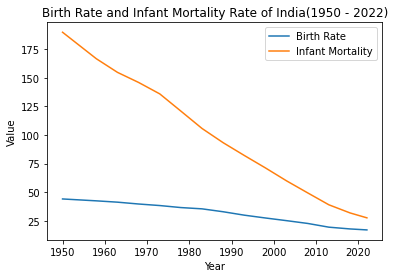

In [41]:
#Birth rate and Infant Mortality rate 
plt.plot(df['Year'],df['Birth Rate'])
plt.plot(df['Year'],df['Infant Mortality Rate'])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Birth Rate and Infant Mortality Rate of India(1950 - 2022)")
plt.legend(["Birth Rate", "Infant Mortality"], loc="upper right");

Text(0.5, 1.0, 'Net Migration Rate of India(1950 - 2022)')

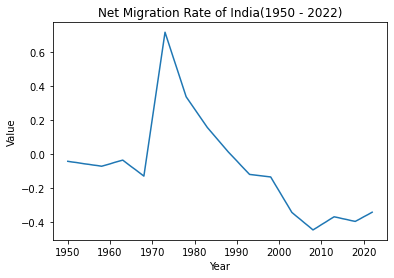

In [42]:
#Net Migration Rate
plt.plot(df['Year'],df['Net Migration Rate'])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Net Migration Rate of India(1950 - 2022)")